# Модуль А. Анализ и предобработка данных

## Импортирование библиотек

In [49]:
# для работы с датафреймами
import pandas as pd

# для визуализации результатов
import matplotlib.pyplot as plt

# для работы с массивами
import numpy as np

# для работы с файловой системой
import os, shutil

# модуль со словарями
from collections import defaultdict

# для создания прогресс-бара
from tqdm import tqdm

# nlp библиотека
import nltk
# модуль со стоп словами
from nltk.corpus import stopwords

# для создания облаков слов
from wordcloud import WordCloud

# модуль с регулярными приложениями
import re

# для работы со строками
import string

# 
from datasets import Dataset, DatasetDict

# вспомогательные функции 
from function import *

#
from transformers import T5Tokenizer

#
import evaluate

In [4]:
# Применяем стиль dark_background
plt.style.use('dark_background')

In [5]:
# Скачиваем стоп-слова для русского языка
nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
# добавление стоп-слов
stop_words.update({"в","и","а","к","с","по","на","для","это","с"})

### Функции

Все функции реализованы в файле `function.py`

```py
# процедура для генерации облака слов
def generate_wordcoud(text: str, color: str = 'black'):
    '''Процедура для создания облака слов'''
    # создаем объект - облако слов
    wordcloud = WordCloud(
        width=800,              # ширина
        height=400,             # высота
        background_color=color  # цвет фона
    ).generate(text)
    
    # визуализация облака слова
    plt.figure(figsize=(10,5))                          # размер фигуры
    plt.imshow(wordcloud, interpolation='bilinear')     # загружаем объект для вывода
    plt.axis('off')                                     # отключаем сетку
    plt.show()                                          # вывод изображения
    
```

```py
# функция для чистки стоп слов
def clean_text(text: str, stop_words: set):
    '''
    Функция для чистки текста от стоп слов
        Args:
            - test (str): текст, который нужно почистить от стоп слов
            - stop_words (set): множество стоп слов
        Returns:
            - отфильтрованный текст (str)
    '''
    # создаем список слов используя split()
    words = text.split()
    # фильтруем слова используя заданное множество
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # возвращаем почищенный текст
    return ' '.join(filtered_words)
```

```py
# функция для построения графиков
def see_distribution(data_stats: dict, 
                     title: str = 'Values distribution',
                     xlabel: str = 'Keys',
                     ylabel: str = 'Values',
                     color: str = 'lightblue',
                     graph_type: str = 'bar',
                     grid: bool = True,
                     meta: bool = True
                     ):
    '''
    Процедура для построения графика распределения данных
        Args:
        - data_stats (dict): словарь с собранной статистикой
        - title (str): название графика
        - xlabel (str): название икса
        - ylabel (str): название игрика
        - color (str): цвет графика
        - grid (bool): включение сетки
        - meta (bool): включение метаинформации
    '''
    # парсим входной словарь
    x, y = data_stats.keys(), data_stats.values()
    
    plt.figure(figsize=(10,5))      # размер фигуры
    # в зависимости от типа графика, строим нужный
    match graph_type:
        # если тип графика - bar
        case 'bar':
            plt.bar(x, y, color=color)      # тип графика
        # если тип графика - plot   
        case 'plot':
            plt.plot(x, y, color=color)     # тип графика
        # если тип графика - plot   
        case 'scatter':
            plt.scatter(x, y, color=color)     # тип графика


    # настраиваем график
    plt.title(title)                # название графика
    plt.xlabel(xlabel)              # подпись к иксу
    plt.ylabel(ylabel)              # подпись к игрику

    # если включена сетка
    if grid:
        # включаем сетку
        plt.grid(True)

    plt.show()                      # вывод графика

    # если включен вывод метаинформации
    if meta:
        # всего значений
        print(f'Counts: {len(x)}')
        # вывод минимального значения
        print(f'Min: {min(y)}')
        # вывод среднего значения
        print(f'Mean: {sum(y)/len(y):.2f}')
        # вывод максмиального значения
        print(f'Max: {max(y)}')
```

In [7]:
# функция для показа примеров
def show_samples(dataset, num_samples: int = 3, seed: int = 42):
    # собираем указанное кол-во примеров
    samples = dataset['train'].shuffle(seed=seed).select(range(num_samples))
    # проходимся по каждому примеру
    for sample in samples:
        # вывод примеров
        print(f">> Статья: {sample['text'][:200]}...")
        print(f">> Аннотация: {sample['summary']}")


## Анализ и предобработка даных

Создам датафрейм, куда помещу пути ко всем файлам

In [8]:
# путь к основной папке с данными
data_dir = '../Data/DATASET/'
# логирование
print(os.path.exists(data_dir))
print(len(os.listdir(data_dir)))

True
1002


In [9]:
# Использование
dataset = Dataset.from_list(reorganize_dataset("../Data/DATASET/"))
dataset

Dataset({
    features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
    num_rows: 1002
})

In [10]:
df = pd.DataFrame(dataset)
df.head()

,text_path,annotation_path,tags_path,text,summary,tag,text_all_symb,summary_all_symb,tag_all_symb,text_clean,summary_clean,tag_clean,text_words,summary_words,tag_words,id
0,../Data/DATASET/1\text.txt,../Data/DATASET/1\annotation.txt,../Data/DATASET/1\tags.txt,Важнейшим вопросом для организации обучения яв...,В электронном учебнике изложены основные разде...,"БАЗА ДАННЫХ, MACROMEDIA FLASH, LIBRARY, ACTION...",5160,379,52,5061,374,49,620,45,6,1
1,../Data/DATASET/10\text.txt,../Data/DATASET/10\annotation.txt,../Data/DATASET/10\tags.txt,Фреймворк - это набор концептуальной структуры...,В этой статье рассматривается Laravel - PHP-фр...,"РАЗРАБОТКА, BACK-END РАЗРАБОТКА, ЗАПРОСЫ, СЕРВ...",6075,212,62,5917,205,58,745,27,6,10
2,../Data/DATASET/100\text.txt,../Data/DATASET/100\annotation.txt,../Data/DATASET/100\tags.txt,В современном мире цифровая трансформация стал...,Тема финансовой кибербезопасности в условиях ц...,"ФИШИНГ, КИБЕРБЕЗОПАСНОСТЬ, ЦИФРОВЫЕ ТЕХНОЛОГИИ...",6692,569,67,6586,564,64,794,69,6,100
3,../Data/DATASET/1000\text.txt,../Data/DATASET/1000\annotation.txt,../Data/DATASET/1000\tags.txt,Разница между ASP.NET и PHP\nASP.NET - это сер...,В статье описана разница между серверной веб-п...,"ASP.NET, PHP, РАЗЛИЧИЯ, DIFFERENCES",5525,172,35,5356,166,31,710,21,4,1000
4,../Data/DATASET/1001\text.txt,../Data/DATASET/1001\annotation.txt,../Data/DATASET/1001\tags.txt,"Всему миру известен данный модный дом, каждая ...","Как появилось имя Коко Шанель? Кто она, создат...","КОКО ШАНЕЛЬ, МОДА XX ВЕКА, ДУХИ CHANEL № 5, МА...",12202,226,68,11905,220,65,1846,35,12,1001


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

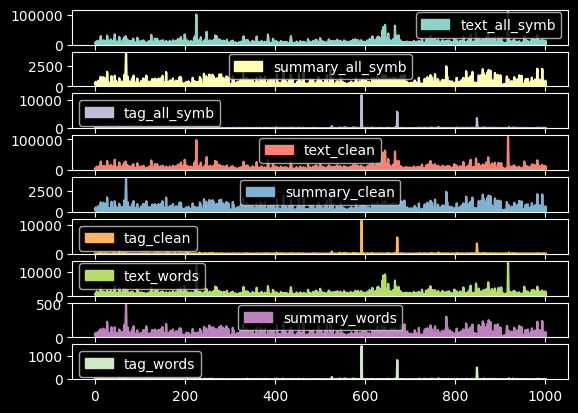

In [11]:
df.plot(kind='area', subplots=True)

На данный момент датасет выглядит довольно разрозненно, поэтому его надо отфильтровать для лучшего качества данных

### Фильтрация

In [13]:
annot_df = df[['summary_all_symb', 'summary_clean']]
annot_df.describe()

,summary_all_symb,summary_clean
count,1002.000000,1002.000000
mean,494.934132,485.199601
std,390.030148,382.093134
min,0.000000,0.000000
25%,243.000000,240.000000
50%,380.500000,374.000000
75%,606.000000,593.000000
max,4082.000000,4007.000000


In [14]:
# функция для фильтрации
def df_filter(df: pd.DataFrame, column: str, upper: float = 0.95, lower: float = 0.05):
    '''Функция для фильтрации датасета по квартилям'''
    #
    upper_bound = df[column].quantile(upper)
    #
    lower_bound = df[column].quantile(lower)

    #
    filtered_df = df[
        (df[column] >= lower_bound) & (df[column] <=upper_bound)
    ]
    
    #
    return filtered_df.dropna()

In [15]:
print(f'Размерность до фильтрации: {df.shape}')

#
filtered_df = df.copy(deep=False)
#
for column in df.columns:
    #
    if 'int64' == df[column].dtype:
        filtered_df = df_filter(filtered_df, column)
    else:
        print(column)


print(f'Размерность после фильтрации: {filtered_df.shape}')
filtered_df.head()

Размерность до фильтрации: (1002, 16)
text_path
annotation_path
tags_path
text
summary
tag
id
Размерность после фильтрации: (412, 16)


,text_path,annotation_path,tags_path,text,summary,tag,text_all_symb,summary_all_symb,tag_all_symb,text_clean,summary_clean,tag_clean,text_words,summary_words,tag_words,id
0,../Data/DATASET/1\text.txt,../Data/DATASET/1\annotation.txt,../Data/DATASET/1\tags.txt,Важнейшим вопросом для организации обучения яв...,В электронном учебнике изложены основные разде...,"БАЗА ДАННЫХ, MACROMEDIA FLASH, LIBRARY, ACTION...",5160,379,52,5061,374,49,620,45,6,1
1,../Data/DATASET/10\text.txt,../Data/DATASET/10\annotation.txt,../Data/DATASET/10\tags.txt,Фреймворк - это набор концептуальной структуры...,В этой статье рассматривается Laravel - PHP-фр...,"РАЗРАБОТКА, BACK-END РАЗРАБОТКА, ЗАПРОСЫ, СЕРВ...",6075,212,62,5917,205,58,745,27,6,10
2,../Data/DATASET/100\text.txt,../Data/DATASET/100\annotation.txt,../Data/DATASET/100\tags.txt,В современном мире цифровая трансформация стал...,Тема финансовой кибербезопасности в условиях ц...,"ФИШИНГ, КИБЕРБЕЗОПАСНОСТЬ, ЦИФРОВЫЕ ТЕХНОЛОГИИ...",6692,569,67,6586,564,64,794,69,6,100
3,../Data/DATASET/1000\text.txt,../Data/DATASET/1000\annotation.txt,../Data/DATASET/1000\tags.txt,Разница между ASP.NET и PHP\nASP.NET - это сер...,В статье описана разница между серверной веб-п...,"ASP.NET, PHP, РАЗЛИЧИЯ, DIFFERENCES",5525,172,35,5356,166,31,710,21,4,1000
5,../Data/DATASET/1002\text.txt,../Data/DATASET/1002\annotation.txt,../Data/DATASET/1002\tags.txt,При разработке веб-сайта перед любым разработч...,В данной статье представлен метод разработки в...,"ПРОГРАММИРОВАНИЕ, ВЕБ-ПРОГРАММИРОВАНИЕ, БАЗА Д...",6776,301,107,6580,295,99,867,38,11,1002


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >], dtype=object)

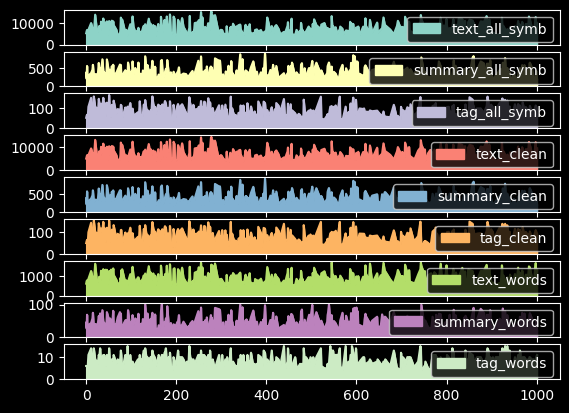

In [16]:
filtered_df.plot(kind='area', subplots=True)

In [17]:
filtered_df.describe()

,text_all_symb,summary_all_symb,tag_all_symb,text_clean,summary_clean,tag_clean,text_words,summary_words,tag_words
count,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000,412.000000
mean,7569.475728,403.148058,86.716019,7347.720874,395.873786,81.609223,938.662621,47.439320,8.449029
std,2457.748414,158.165133,30.093276,2406.313019,155.269889,28.696842,295.718820,18.649507,2.788545
min,3452.000000,165.000000,32.000000,3352.000000,162.000000,31.000000,490.000000,21.000000,4.000000
25%,5611.750000,281.000000,63.750000,5398.750000,276.500000,59.750000,703.250000,32.000000,6.000000
50%,7237.000000,372.000000,83.000000,6924.500000,366.000000,78.500000,876.000000,44.000000,8.000000
75%,8985.250000,495.000000,108.000000,8774.500000,485.000000,102.000000,1122.500000,58.000000,10.000000
max,15207.000000,924.000000,166.000000,14695.000000,911.000000,153.000000,1726.000000,101.000000,15.000000


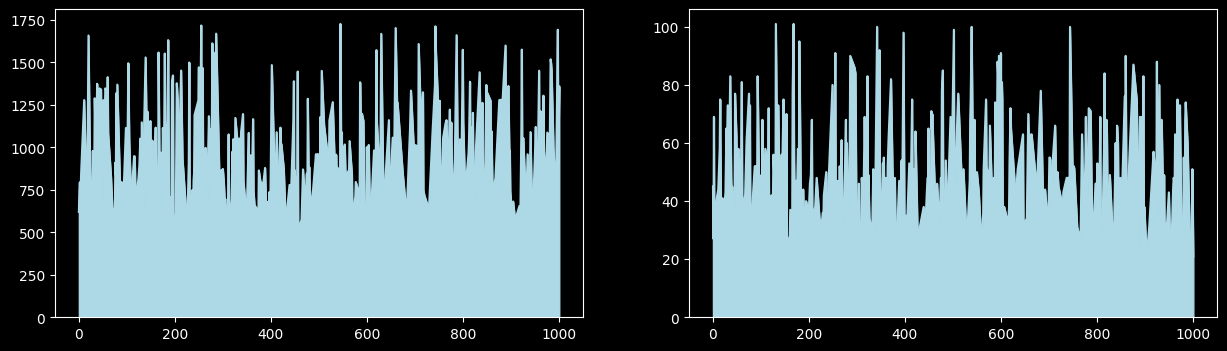

In [28]:
#
fig, ax = plt.subplots(1,2, figsize=(15,4))
#
filtered_df['text_words'].plot(kind='area', color='lightblue', ax=ax[0])
#
filtered_df['summary_words'].plot(kind='area', color='lightblue', ax=ax[1])
plt.show()

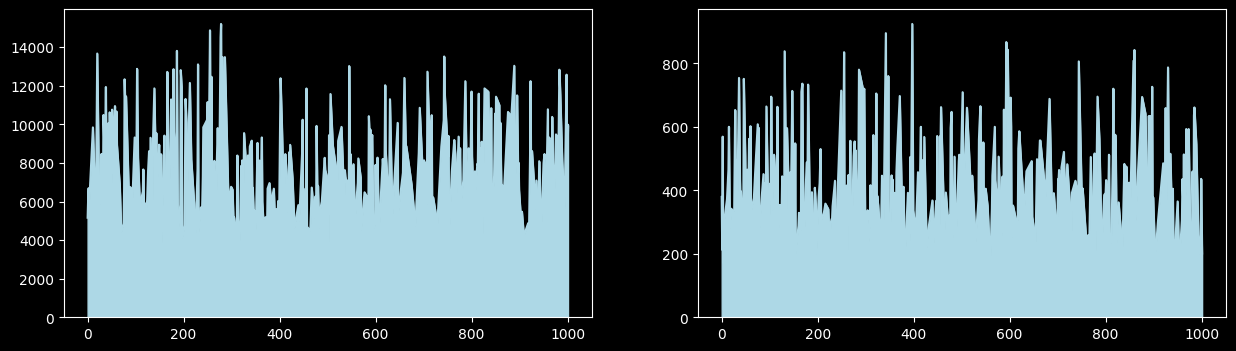

In [29]:
#
fig, ax = plt.subplots(1,2, figsize=(15,4))
#
filtered_df['text_all_symb'].plot(kind='area', color='lightblue', ax=ax[0])
#
filtered_df['summary_all_symb'].plot(kind='area', color='lightblue', ax=ax[1])
plt.show()

In [32]:
filtered_df['summary_all_symb'].describe()

count    412.000000
mean     403.148058
std      158.165133
min      165.000000
25%      281.000000
50%      372.000000
75%      495.000000
max      924.000000
Name: summary_all_symb, dtype: float64

In [19]:
samples = filtered_df.to_dict('records')

In [20]:
dataset_fin = split_dataset(samples)
dataset_fin

DatasetDict({
    train: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
        num_rows: 329
    })
    validation: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
        num_rows: 41
    })
    test: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id'],
        num_rows: 42
    })
})

In [21]:
model_checkpoint = 'google/mt5-small'
tokenizer = T5Tokenizer.from_pretrained(model_checkpoint)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [22]:
inputs = tokenizer('I loved reading the Hunger Games!')
inputs

{'input_ids': [336, 259, 28387, 11807, 287, 62893, 295, 12507, 309, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [25]:
#
tokenizer.convert_ids_to_tokens(inputs.input_ids)

['▁I', '▁', 'loved', '▁reading', '▁the', '▁Hung', 'er', '▁Games', '!', '</s>']

Для токенизации нашего корпуса нам придется столкнуться с одной тонкостью, связанной с сумризацией: поскольку наши метки также являются текстом, возможно, что они превышают максимальный размер контекста модели. Это означает, что нам нужно применять усечение как к обзорам, так и к их заголовкам, чтобы не передавать в модель слишком длинные данные. Токенизаторы в 🤗 Transformers предоставляют интересный аргумент text_target, который позволяет вам токенизировать метки параллельно с входными данными. Вот пример того, как обрабатываются входные и целевые данные для mT5:

In [39]:
max_input_length = 2**13
max_target_length = 2**9

def preprocess_function(examples):
    '''
    
    '''
    #
    model_inputs = tokenizer(
        examples['text'],
        max_length = max_input_length,
        truncation=True
    )
    #
    labels = tokenizer(
        examples['summary'], max_length=max_target_length, truncation=True
    )
    #
    model_inputs['labels'] = labels['input_ids']
    
    return model_inputs

In [41]:
tokenized_dataset = dataset_fin.map(preprocess_function, batched=True)
print(type(tokenized_dataset))
tokenized_dataset

Map:   0%|          | 0/329 [00:00<?, ? examples/s]

Map: 100%|██████████| 42/42 [00:00<00:00, 133.86 examples/s]

<class 'datasets.dataset_dict.DatasetDict'>


DatasetDict({
    train: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 329
    })
    validation: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 41
    })
    test: Dataset({
        features: ['text_path', 'annotation_path', 'tags_path', 'text', 'summary', 'tag', 'text_all_symb', 'summary_all_symb', 'tag_all_symb', 'text_clean', 'summary_clean', 'tag_clean', 'text_words', 'summary_words', 'tag_words', 'id', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 42
    

In [47]:
some_df = pd.DataFrame(tokenized_dataset['train'])
some_df.head()

,text_path,annotation_path,tags_path,text,summary,tag,text_all_symb,summary_all_symb,tag_all_symb,text_clean,summary_clean,tag_clean,text_words,summary_words,tag_words,id,input_ids,attention_mask,labels
0,../Data/DATASET/609\text.txt,../Data/DATASET/609\annotation.txt,../Data/DATASET/609\tags.txt,В настоящее время практически все области чело...,В данной статье содержится обзор основных возм...,"ЯЗЫКИ ПРОГРАММИРОВАНИЯ, СРАВНИТЕЛЬНЫЙ АНАЛИЗ",7259,600,44,6596,593,43,841,75,4,609,"[635, 259, 20927, 3205, 5222, 259, 31257, 279,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[635, 446, 36659, 16525, 324, 55439, 4013, 118..."
1,../Data/DATASET/728\text.txt,../Data/DATASET/728\annotation.txt,../Data/DATASET/728\tags.txt,В мире веб-разработки существует множество спо...,В рамках исследования рассматриваются основные...,"ВЕБ-ПРИЛОЖЕНИЯ, КЛАССИЧЕСКИЙ ПРОЦЕСС, REACT, С...",8137,435,66,7935,426,61,1012,55,6,728,"[635, 259, 39638, 37175, 264, 9673, 114339, 27...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[635, 14455, 6150, 39137, 396, 2839, 36909, 11..."
2,../Data/DATASET/549\text.txt,../Data/DATASET/549\annotation.txt,../Data/DATASET/549\tags.txt,"Разработчики заметили, что нужны однотипные ко...",Обозначена актуальность и сфера применения web...,"ИНФОРМАЦИОННАЯ СИСТЕМА, WEB-ФРЕЙМВОРК, ТЕХНОЛО...",3952,709,75,3687,693,71,500,99,7,549,"[259, 182001, 65869, 62503, 2223, 261, 892, 75...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4146, 180785, 308, 93550, 101616, 259, 279, 2..."
3,../Data/DATASET/973\text.txt,../Data/DATASET/973\annotation.txt,../Data/DATASET/973\tags.txt,Введение. Сохранение и изучение культурного на...,В статье исследуется пример взаимодействия сти...,"АВАНГАРД В АРХИТЕКТУРЕ, МОДЕРНИЗМ В АРХИТЕКТУР...",6727,593,90,6564,580,87,824,73,10,973,"[635, 31240, 260, 688, 68909, 2729, 259, 279, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[635, 16525, 324, 10604, 27162, 21145, 14582, ..."
4,../Data/DATASET/936\text.txt,../Data/DATASET/936\annotation.txt,../Data/DATASET/936\tags.txt,Важным инструментом государственного регулиро...,В статье рассматриваются отдельные вопросы пра...,"ПРЕДПРИНИМАТЕЛЬСКАЯ ДЕЯТЕЛЬНОСТЬ, ЛИЦЕНЗИРОВАН...",5614,351,126,5506,347,122,632,33,9,936,"[12811, 132674, 35465, 637, 21333, 893, 28751,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[635, 16525, 324, 2839, 36909, 11354, 11307, 1..."


In [48]:
gen_summary = 'I absolutely loved reading the Hunger'
ref_summary = 'I loved reading the Hunger Games'

мы можем использовать функцию rouge_score.compute(), чтобы рассчитать все метрики сразу

In [50]:
rouge_score = evaluate.load('rouge')

In [51]:
scores = rouge_score.compute(
    predictions=[gen_summary], references=[ref_summary]
)
#
scores

{'rouge1': np.float64(0.8333333333333334),
 'rouge2': np.float64(0.6),
 'rougeL': np.float64(0.8333333333333334),
 'rougeLsum': np.float64(0.8333333333333334)}

скачиваем правила пунктуации

In [55]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user1\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [58]:
from nltk.tokenize import sent_tokenize

def three_sentence_summary(text):
    return '\n'.join(sent_tokenize(text)[:3])

print(three_sentence_summary(dataset_fin['train'][1]['text']))

В мире веб-разработки существует множество способов создания веб-приложений.
Один
из наиболее популярных подходов - это использование библиотеки React.
Однако до появления
React существовали классические способы создания веб-приложений.


In [59]:
#
def evaluate_baseline(dataset, metric):
    #
    summaries = [three_sentence_summary(text) for text in dataset['text']]
    #
    return metric.compute(predictions=summaries, references=dataset['summary'])

In [63]:
score = evaluate_baseline(dataset_fin['validation'], rouge_score)
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"]
#
rouge_dict = dict((rn, round(score[rn]*100, 2)) for rn in rouge_names)
rouge_dict

{'rouge1': np.float64(7.8),
 'rouge2': np.float64(2.35),
 'rougeL': np.float64(7.89),
 'rougeLsum': np.float64(7.76)}

In [8]:
# список со словами текста
wordlist = []
# словарь для статистики слов
word_stats = defaultdict(int)
# проходимся по каждой строке датафрейма
for i in range(df.shape[0]):
    # получаем путь к файлу к тексту
    text_path = df.loc[i]['text']
    # читаем файл к тексту
    with open(text_path, 'r', encoding='utf-8') as file:
        # читаем текст
        text = clean_text(file.read(), stop_words)
        # проходимся по каждому слову
        for word in text.split():
            # обрабатываем слово
            word = re.sub(r'[{}]'.format(string.punctuation), '', word.lower())
            # добавляем слово в статистику
            word_stats[word] +=1
            # добавляем слово в список
            wordlist.append(word)


    full_word = ''
    # wordlist = list(set(wordlist))
    for word in wordlist:
        full_word+=f' {word}'

    break


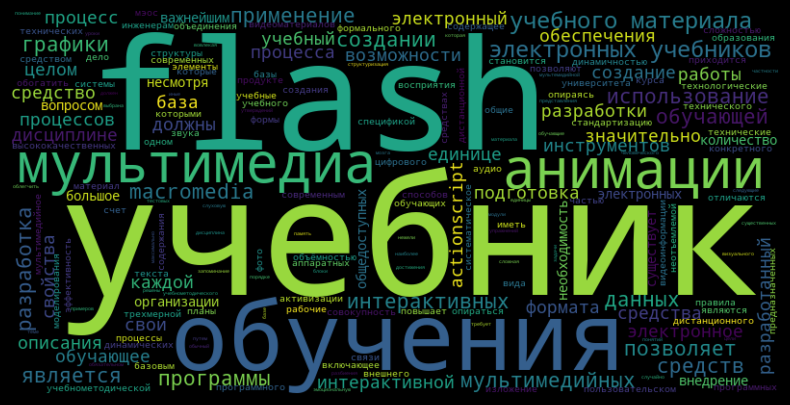

In [9]:
generate_wordcoud(full_word)

Проверим распределение длины текстов и разметок (annotation)

In [10]:
# словарь для статистики длины текстов
text_stats = defaultdict(int)
# словарь для статистики длины текстов без спец символов
text_spec_stats = defaultdict(int)
# проходимся по каждой строке датафрейма
for i in range(df.shape[0]):
    # получаем путь к файлу к тексту
    text_path = df.loc[i]['text']
    # читаем файл к тексту
    with open(text_path, 'r', encoding='utf-8') as file:
        # получаем текст
        text = file.read()
        # обновляем словарь с спец символами
        text_stats[i] = len(text)
        # обновляем словарь без спец символов
        text_spec_stats[i] = len(re.sub(r'[{}]'.format(string.punctuation), '',text))

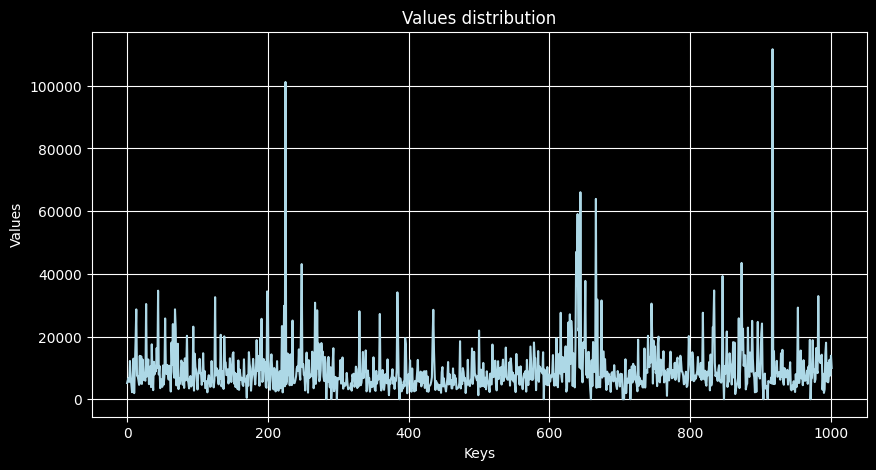

Counts: 1002
Min: 0
Mean: 9244.45
Max: 111644


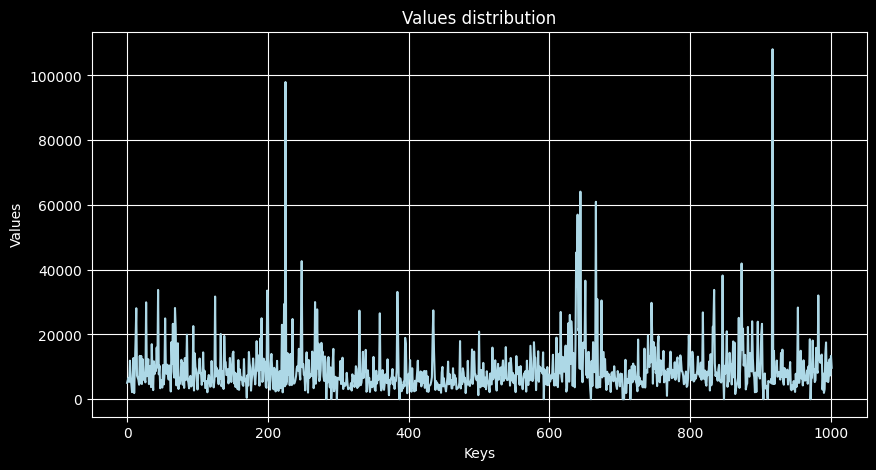

Counts: 1002
Min: 0
Mean: 8970.66
Max: 108116


In [11]:
# график для статистики со спец символами
see_distribution(text_stats, graph_type='plot', grid=True)
# # график для статистики без спец символов
see_distribution(text_spec_stats, graph_type='plot', grid=True)

Попробуем нормализовать наши графики

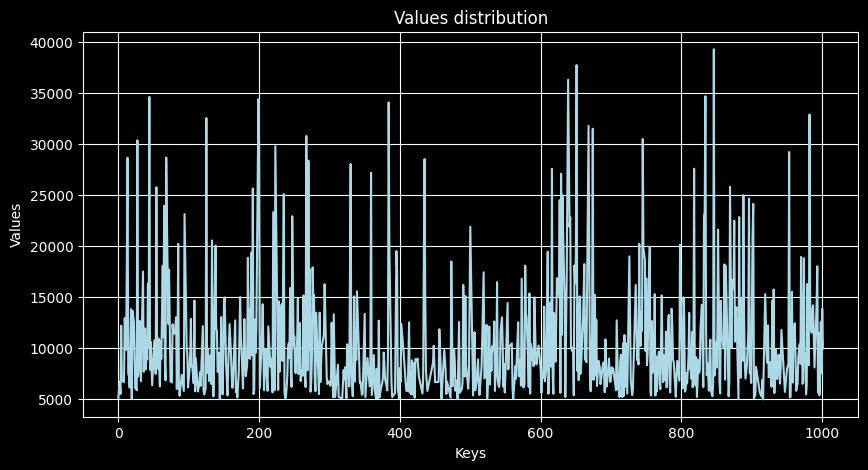

Counts: 748
Min: 5007
Mean: 10515.11
Max: 39291


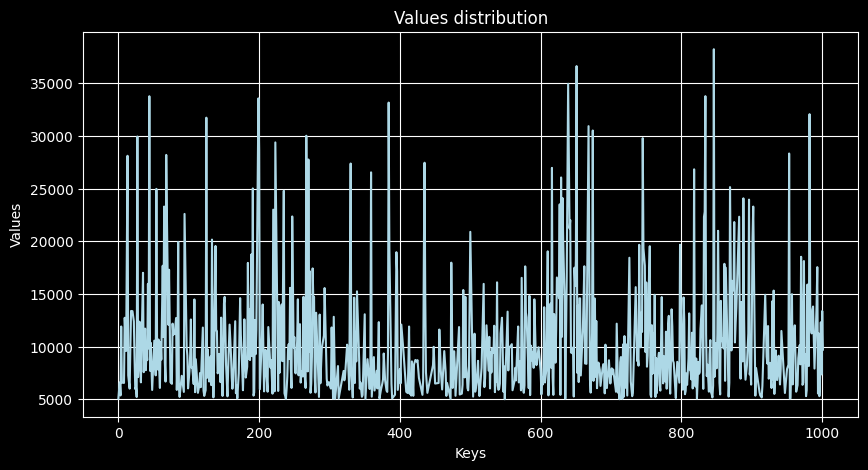

Counts: 732
Min: 5003
Mean: 10321.56
Max: 38218


In [12]:
# график для статистики со спец символами
see_distribution({k: v for k, v in text_stats.items() if 5000 < v < 40000}, graph_type='plot')
# # график для статистики без спец символов
see_distribution({k: v for k, v in text_spec_stats.items() if 5000 < v < 40000}, graph_type='plot')

In [13]:
# словарь для статистики длины аннотаиций
annot_stats = defaultdict(int)
# словарь для статистики длины аннотаций без спец символов
annot_spec_stats = defaultdict(int)
# проходимся по каждой строке датафрейма
for i in range(df.shape[0]):
    # получаем путь к файлу к аннотации
    text_path = df.loc[i]['annotation']
    # читаем файл к аннотации
    with open(text_path, 'r', encoding='utf-8') as file:
        # получаем аннотацию
        annot = file.read()
        # обновляем словарь с спец символами
        annot_stats[i] = len(annot)
        # обновляем словарь без спец символов
        annot_spec_stats[i] = len(re.sub(r'[{}]'.format(string.punctuation), '',annot))

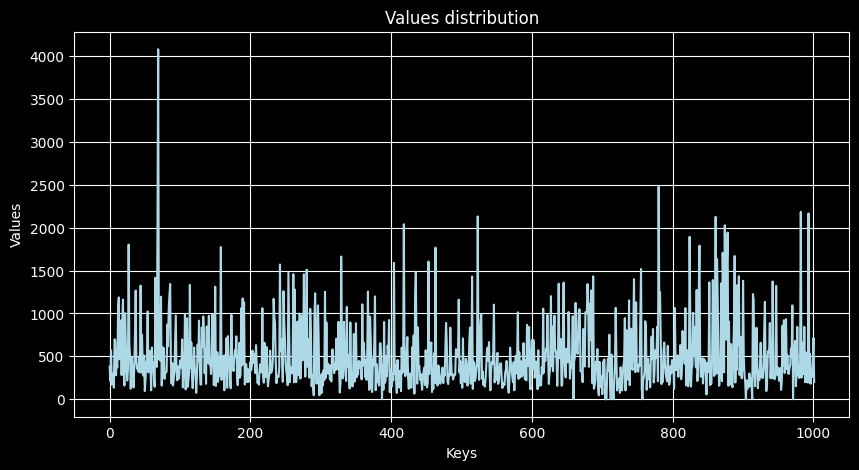

Counts: 1002
Min: 0
Mean: 495.30
Max: 4082


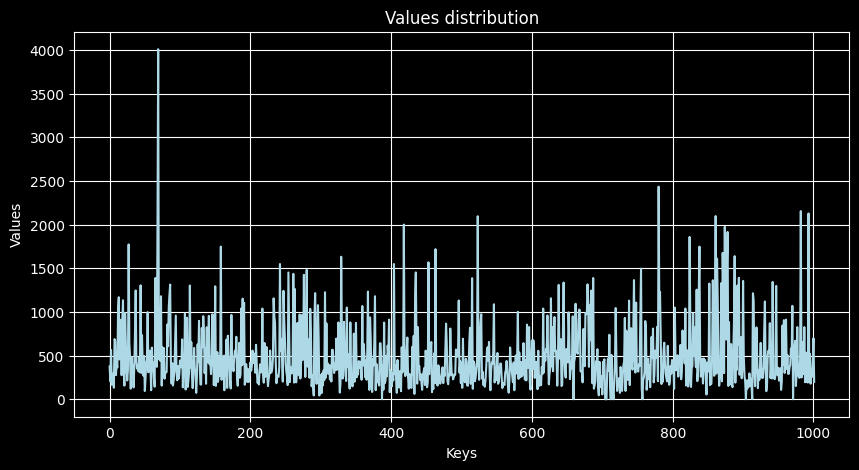

Counts: 1002
Min: 0
Mean: 485.56
Max: 4007


In [14]:
# график для статистики со спец символами
see_distribution(annot_stats, graph_type='plot', grid=True)
# # график для статистики без спец символов
see_distribution(annot_spec_stats, graph_type='plot', grid=True)

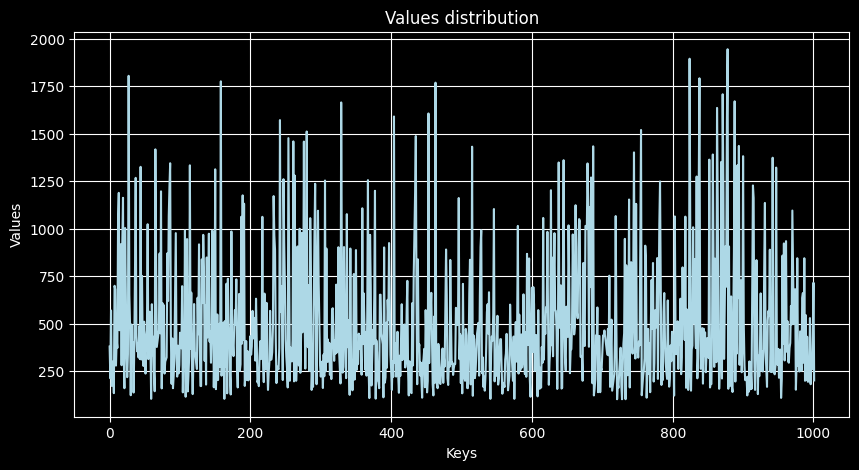

Counts: 963
Min: 102
Mean: 491.81
Max: 1944


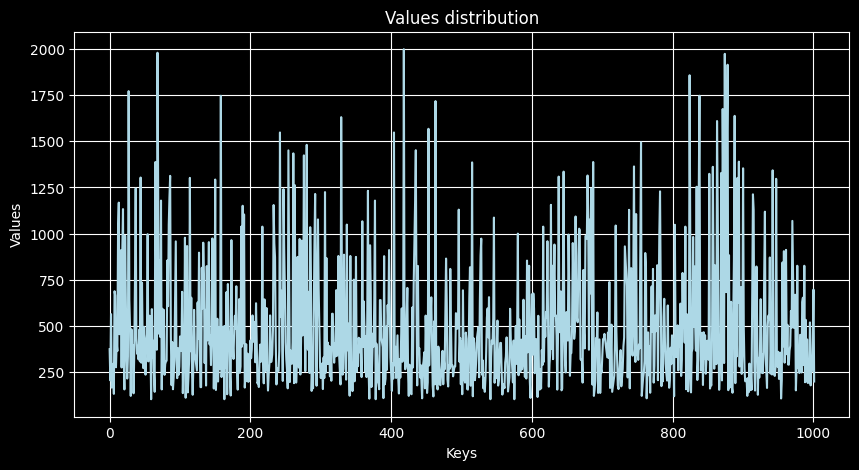

Counts: 963
Min: 103
Mean: 488.05
Max: 1999


In [15]:
# график для статистики со спец символами
see_distribution({k: v for k, v in annot_stats.items() if 100 < v < 2000}, graph_type='plot')
# # график для статистики без спец символов
see_distribution({k: v for k, v in annot_spec_stats.items() if 100 < v < 2000}, graph_type='plot')